# Assignment 06 : Team 01

Bhawana Agarwal, Cheril Yogi, Tripti Gupta 


# Problem Statement

To design a chatbot 

In [1]:
# Importing necessary Libraries 

import csv
import itertools
import operator
import numpy as np
import nltk
import sys
from datetime import datetime
import string

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download NLTK model data (you need to do this once)
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/cherilyogi/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/cherilyogi/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/cherilyogi/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/cherilyogi/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/cherilyogi/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/cherilyogi/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date

True

Setting up some variables for text processing tasks.

In [3]:
vocabulary_size = 3000 # can be improved by using a larger vocabulary size

unknown_token = "UNKNOWN_TOKEN" # for words not in vocabulary
sentence_start_token = "START" # representing start of a sentence
sentence_end_token = 'END' # representing end of a sentence

# Preprocessing

Using indicnlp library, for natural language processing in Indian languages (Hindi in our case). We are using indicnlp as it provides better tools and resources for working with various Indian languages, including tokenization, trasliteration, and other NLP tasks. We are using few excerpts from the "Story of Mirabai" as our dataset for training and testing our model. 

In [4]:
import indicnlp

Tokenizing a text file written in the Hindi language using the `indicnlp library`. The code reads the content of the file named "mirabai.txt" and then tokenizes it into sentences. 

In [6]:
from indicnlp.tokenize import sentence_tokenize, indic_tokenize

with open(r"/Users/cherilyogi/Desktop/Class_Folder/INFO_6106/Homework_7/mirabai.txt", 'r', encoding="utf-8") as f:
    content = f.read()
# Tokenize the conversation into sentences
text = content.strip()
text = text.replace("\n"," ")
text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
sentences = sentence_tokenize.sentence_split(text, lang='hi')

The text we took as our dataset look someting like this :

In [7]:
text

'मीराबाई के बालमन में कृष्ण की ऐसी छवि बसी थी कि किशोरावस्था से लेकर मृत्यु तक उन्होंने कृष्ण को ही अपना सब कुछ माना। जोधपुर के राठौड़ रतनसिंह जी की इकलौती पुत्री मीराबाई का जन्म सोलहवीं शताब्दी में हुआ था। बचपन से ही वह कृष्णभक्ति में रम गई थीं।  मीराबाई के बचपन में हुई एक घटना की वजह से उनका कृष्णप्रेम अपनी चरम अवस्था तक पहुंचा। एक दिन उनके पड़ोस में किसी बड़े आदमी के यहां बारात आई। सभी औरतें छत पर खड़ी होकर बारात देख रही थीं। मीरा भी बारात देखने लगीं। बारात को देख मीरा ने अपनी माता से पूछा कि मेरा दूल्हा कौन है इस पर उनकी माता ने कृष्ण की मूर्ति की ओर इशारा कर के कह दिया कि यही तुम्हारे दूल्हा हैं। बस यह बात मीरा के बालमन में एक गांठ की तरह बंध गई।  बाद में मीराबाई की शादी महाराणा सांगा के पुत्र भोजराज जो आगे चलकर महाराणा कुंभा कहलाए से कर दी गई। इस शादी के लिए पहले तो मीराबाई ने मना कर दिया लेकिन जोर देने पर वह फूटफूट कर रोने लगीं। शादी के बाद विदाई के समय वे कृष्ण की वही मूर्ति अपने साथ ले गईं जिसे उनकी माता ने उनका दूल्हा बताया था। ससुराल में अपने घरेलू कामकाज निबटाने के बाद मीरा रोज

This code will create a list `append_start_token` where each element is a sentence with start and end tokens added to it, which is a useful step in text generation

In [8]:
append_start_token = [sentence_start_token + ' ' + x + ' ' + sentence_end_token for x in sentences ]

In [9]:
append_start_token

['START मीराबाई के बालमन में कृष्ण की ऐसी छवि बसी थी कि किशोरावस्था से लेकर मृत्यु तक उन्होंने कृष्ण को ही अपना सब कुछ माना। END',
 'START जोधपुर के राठौड़ रतनसिंह जी की इकलौती पुत्री मीराबाई का जन्म सोलहवीं शताब्दी में हुआ था। END',
 'START बचपन से ही वह कृष्णभक्ति में रम गई थीं। END',
 'START मीराबाई के बचपन में हुई एक घटना की वजह से उनका कृष्णप्रेम अपनी चरम अवस्था तक पहुंचा। END',
 'START एक दिन उनके पड़ोस में किसी बड़े आदमी के यहां बारात आई। END',
 'START सभी औरतें छत पर खड़ी होकर बारात देख रही थीं। END',
 'START मीरा भी बारात देखने लगीं। END',
 'START बारात को देख मीरा ने अपनी माता से पूछा कि मेरा दूल्हा कौन है इस पर उनकी माता ने कृष्ण की मूर्ति की ओर इशारा कर के कह दिया कि यही तुम्हारे दूल्हा हैं। END',
 'START बस यह बात मीरा के बालमन में एक गांठ की तरह बंध गई। END',
 'START बाद में मीराबाई की शादी महाराणा सांगा के पुत्र भोजराज जो आगे चलकर महाराणा कुंभा कहलाए से कर दी गई। END',
 'START इस शादी के लिए पहले तो मीराबाई ने मना कर दिया लेकिन जोर देने पर वह फूटफूट कर रोने लगीं। END',
 'STA

This code will tokenize each sentence in the `append_start_token` list into words and print the resulting word tokens for each sentence. This is a common step in natural language processing for breaking down text into its constituent words.

In [10]:
# Tokenize each sentence into words
tokenized_conversation = [indic_tokenize.trivial_tokenize(sentence) for sentence in append_start_token]

# Print the tokenized conversation
for sentence in tokenized_conversation:
    print(sentence)

['START', 'मीराबाई', 'के', 'बालमन', 'में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था', 'से', 'लेकर', 'मृत्यु', 'तक', 'उन्होंने', 'कृष्ण', 'को', 'ही', 'अपना', 'सब', 'कुछ', 'माना', '।', 'END']
['START', 'जोधपुर', 'के', 'राठौड़', 'रतनसिंह', 'जी', 'की', 'इकलौती', 'पुत्री', 'मीराबाई', 'का', 'जन्म', 'सोलहवीं', 'शताब्दी', 'में', 'हुआ', 'था', '।', 'END']
['START', 'बचपन', 'से', 'ही', 'वह', 'कृष्णभक्ति', 'में', 'रम', 'गई', 'थीं', '।', 'END']
['START', 'मीराबाई', 'के', 'बचपन', 'में', 'हुई', 'एक', 'घटना', 'की', 'वजह', 'से', 'उनका', 'कृष्णप्रेम', 'अपनी', 'चरम', 'अवस्था', 'तक', 'पहुंचा', '।', 'END']
['START', 'एक', 'दिन', 'उनके', 'पड़ोस', 'में', 'किसी', 'बड़े', 'आदमी', 'के', 'यहां', 'बारात', 'आई', '।', 'END']
['START', 'सभी', 'औरतें', 'छत', 'पर', 'खड़ी', 'होकर', 'बारात', 'देख', 'रही', 'थीं', '।', 'END']
['START', 'मीरा', 'भी', 'बारात', 'देखने', 'लगीं', '।', 'END']
['START', 'बारात', 'को', 'देख', 'मीरा', 'ने', 'अपनी', 'माता', 'से', 'पूछा', 'कि', 'मेरा', 'दूल्हा', 'कौन', 'है', 'इस', 'प

This code will give a count of how many unique word tokens are present in the text data. The result will be printed as "Found X unique word tokens," where X is the count of unique words.

In [11]:
# Count the word frequencies
from collections import Counter
word_freq = Counter(word for sent in tokenized_conversation for word in sent)
print("Found %d unique word tokens." % len(word_freq))

Found 699 unique word tokens.


This code is building index-to-word and word-to-index mappings, as we are preparing the most common words. 

In [12]:
# Get the most common words and build index_to_word and word_to_index vectors
vocabulary_size = len(word_freq)
index_to_word = list(word_freq.keys())
index_to_word.append(unknown_token)
word_to_index = {w: i for i, w in enumerate(index_to_word)}
print("The least frequent word in our vocabulary is '%s' and appeared %d times." % word_freq.most_common()[-1])

The least frequent word in our vocabulary is 'जस' and appeared 1 times.


This code iterates through each tokenized sentence and replaces words that are not in the vocabulary with the `"unknown_token"`. It then prints the vocabulary size and shows an example sentence before and after this preprocessing step. This ensures that all words in the text data are represented within our predefined vocabulary.

In [13]:
# Replace all words not in our vocabulary with the unknown token
for i, sent in enumerate(tokenized_conversation):
    tokenized_conversation[i] = [w if w in word_freq else unknown_token for w in sent]

print("Using vocabulary size %d." % vocabulary_size)

print("\nExample sentence: '%s'" % sentences[0])
print("\nExample sentence after pre-processing: '%s'" % tokenized_conversation[0])

Using vocabulary size 699.

Example sentence: 'मीराबाई के बालमन में कृष्ण की ऐसी छवि बसी थी कि किशोरावस्था से लेकर मृत्यु तक उन्होंने कृष्ण को ही अपना सब कुछ माना।'

Example sentence after pre-processing: '['START', 'मीराबाई', 'के', 'बालमन', 'में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था', 'से', 'लेकर', 'मृत्यु', 'तक', 'उन्होंने', 'कृष्ण', 'को', 'ही', 'अपना', 'सब', 'कुछ', 'माना', '।', 'END']'


This code will print a list of the most common words in the text data, along with their respective frequencies. Thi step is useful for understanding which words are prevalent in the text and may be important for our task. 

In [14]:
# Get the most common words
most_common_words = word_freq.most_common()
print("The most common words:")
for word, frequency in most_common_words:
    print(f"'{word}': {frequency}")

The most common words:
'START': 112
'।': 112
'END': 112
'के': 71
'मीरा': 50
'में': 45
'की': 43
'से': 39
'है': 36
'और': 31
'कि': 29
'को': 25
'का': 25
'कर': 25
'कृष्ण': 19
'उनके': 16
'ने': 16
'साथ': 16
'वह': 14
'थीं': 14
'एक': 14
'था': 13
'यह': 13
'नहीं': 13
'पर': 12
'भी': 12
'तो': 12
'कोई': 12
'लिए': 11
'दिया': 10
'हैं': 10
'ही': 9
'लेकिन': 9
'प्रेम': 9
'गया': 9
'मीराबाई': 8
'अपनी': 8
'इस': 8
'मूर्ति': 8
'बाद': 8
'अपने': 8
'उसने': 8
'हो': 8
'भक्ति': 8
'उन्होंने': 7
'जो': 7
'सामने': 7
'जब': 7
'पति': 7
'मन': 7
'आप': 7
'तक': 6
'रही': 6
'उनकी': 6
'वे': 6
'थे': 6
'राणा': 6
'लिया': 6
'अपना': 5
'कुछ': 5
'किसी': 5
'यहां': 5
'यही': 5
'तरह': 5
'गईं': 5
'कई': 5
'लोगों': 5
'बहुत': 5
'किया': 5
'शरीर': 5
'थी': 4
'गई': 4
'उनका': 4
'बारात': 4
'माता': 4
'मेरा': 4
'मंदिर': 4
'उन्हें': 4
'कहा': 4
'प्रेमी': 4
'प्रति': 4
'फूलों': 4
'भावनाओं': 4
'लोग': 4
'गुरु': 4
'ऐसी': 3
'सब': 3
'वजह': 3
'देख': 3
'दूल्हा': 3
'बात': 3
'शादी': 3
'कुंभा': 3
'दी': 3
'पहले': 3
'करने': 3
'बातें': 3
'फिर': 3
'रहे': 3
'टोकरी': 3
'

In [15]:
append_start_token[:5]

['START मीराबाई के बालमन में कृष्ण की ऐसी छवि बसी थी कि किशोरावस्था से लेकर मृत्यु तक उन्होंने कृष्ण को ही अपना सब कुछ माना। END',
 'START जोधपुर के राठौड़ रतनसिंह जी की इकलौती पुत्री मीराबाई का जन्म सोलहवीं शताब्दी में हुआ था। END',
 'START बचपन से ही वह कृष्णभक्ति में रम गई थीं। END',
 'START मीराबाई के बचपन में हुई एक घटना की वजह से उनका कृष्णप्रेम अपनी चरम अवस्था तक पहुंचा। END',
 'START एक दिन उनके पड़ोस में किसी बड़े आदमी के यहां बारात आई। END']

The `Counter class` from the collections module is used to count the bigrams, and ngrams from NLTK is used to generate bigrams from the list of words in the text.
The `%time` magic command is used to measure the execution time of the code cell.
The code will print the top 10 most common bigrams in the text, along with their counts. This is useful for analyzing patterns and relationships between words in the text data. Smilarly we are also finding most common trigram, quadgram, pentagram and so on. 

In [16]:
%%time
from collections import Counter
from nltk import ngrams
bigram_counts = Counter(ngrams(text.split(), 2))
bigram_counts.most_common(10)

CPU times: user 443 µs, sys: 21 µs, total: 464 µs
Wall time: 467 µs


[(('मीरा', 'के'), 13),
 (('के', 'साथ'), 11),
 (('मीरा', 'ने'), 9),
 (('के', 'लिए'), 8),
 (('है', 'कि'), 8),
 (('कृष्ण', 'की'), 7),
 (('मीरा', 'को'), 7),
 (('मीरा', 'का'), 6),
 (('के', 'बाद'), 5),
 (('कृष्ण', 'के'), 5)]

In [17]:
%%time
import collections
def ngrams(text, n=2):
    return zip(*[text[i:] for i in range(n)])
bigram_counts = collections.Counter(ngrams(text.split(), 2))
bigram_counts.most_common(10)

CPU times: user 368 µs, sys: 32 µs, total: 400 µs
Wall time: 403 µs


[(('मीरा', 'के'), 13),
 (('के', 'साथ'), 11),
 (('मीरा', 'ने'), 9),
 (('के', 'लिए'), 8),
 (('है', 'कि'), 8),
 (('कृष्ण', 'की'), 7),
 (('मीरा', 'को'), 7),
 (('मीरा', 'का'), 6),
 (('के', 'बाद'), 5),
 (('कृष्ण', 'के'), 5)]

In [18]:
trigram_counts = Counter(ngrams(text.split(), 3))
trigram_counts.most_common(10)

[(('शरीर', 'मन', 'और'), 3),
 (('के', 'बालमन', 'में'), 2),
 (('उन्होंने', 'कृष्ण', 'को'), 2),
 (('मीरा', 'ने', 'अपनी'), 2),
 (('उनकी', 'माता', 'ने'), 2),
 (('कृष्ण', 'की', 'मूर्ति'), 2),
 (('के', 'बाद', 'मीरा'), 2),
 (('मूर्ति', 'के', 'सामने'), 2),
 (('जब', 'मीरा', 'ने'), 2),
 (('उसने', 'मीरा', 'को'), 2)]

In [19]:
quadgram_counts = Counter(ngrams(text.replace('&', 'i').split(), 4))
quadgram_counts.most_common(10)

[(('कृष्ण', 'के', 'प्रति', 'मीरा'), 2),
 (('के', 'प्रति', 'मीरा', 'का'), 2),
 (('प्रति', 'मीरा', 'का', 'प्रेम'), 2),
 (('शरीर', 'मन', 'और', 'भावनाओं'), 2),
 (('थी', 'कि', 'कृष्ण', 'उनके'), 2),
 (('अपने', 'दिव्य', 'प्रेमी', 'के'), 2),
 (('दिव्य', 'प्रेमी', 'के', 'साथ'), 2),
 (('जागरुकता', 'और', 'प्रेम', 'के'), 2),
 (('और', 'प्रेम', 'के', 'साथ'), 2),
 (('मीराबाई', 'के', 'बालमन', 'में'), 1)]

In [20]:
pentagram_counts = Counter(ngrams(text.split(), 5))
pentagram_counts.most_common(10)

[(('कृष्ण', 'के', 'प्रति', 'मीरा', 'का'), 2),
 (('के', 'प्रति', 'मीरा', 'का', 'प्रेम'), 2),
 (('अपने', 'दिव्य', 'प्रेमी', 'के', 'साथ'), 2),
 (('जागरुकता', 'और', 'प्रेम', 'के', 'साथ'), 2),
 (('मीराबाई', 'के', 'बालमन', 'में', 'कृष्ण'), 1),
 (('के', 'बालमन', 'में', 'कृष्ण', 'की'), 1),
 (('बालमन', 'में', 'कृष्ण', 'की', 'ऐसी'), 1),
 (('में', 'कृष्ण', 'की', 'ऐसी', 'छवि'), 1),
 (('कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी'), 1),
 (('की', 'ऐसी', 'छवि', 'बसी', 'थी'), 1)]

In [21]:
hexagram_counts = Counter(ngrams(text.split(), 6))
hexagram_counts.most_common(10)

[(('कृष्ण', 'के', 'प्रति', 'मीरा', 'का', 'प्रेम'), 2),
 (('मीराबाई', 'के', 'बालमन', 'में', 'कृष्ण', 'की'), 1),
 (('के', 'बालमन', 'में', 'कृष्ण', 'की', 'ऐसी'), 1),
 (('बालमन', 'में', 'कृष्ण', 'की', 'ऐसी', 'छवि'), 1),
 (('में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी'), 1),
 (('कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी'), 1),
 (('की', 'ऐसी', 'छवि', 'बसी', 'थी', 'कि'), 1),
 (('ऐसी', 'छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था'), 1),
 (('छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था', 'से'), 1),
 (('बसी', 'थी', 'कि', 'किशोरावस्था', 'से', 'लेकर'), 1)]

In [22]:
heptagram_counts = Counter(ngrams(text.split(), 7))
heptagram_counts.most_common(10)

[(('मीराबाई', 'के', 'बालमन', 'में', 'कृष्ण', 'की', 'ऐसी'), 1),
 (('के', 'बालमन', 'में', 'कृष्ण', 'की', 'ऐसी', 'छवि'), 1),
 (('बालमन', 'में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी'), 1),
 (('में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी'), 1),
 (('कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी', 'कि'), 1),
 (('की', 'ऐसी', 'छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था'), 1),
 (('ऐसी', 'छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था', 'से'), 1),
 (('छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था', 'से', 'लेकर'), 1),
 (('बसी', 'थी', 'कि', 'किशोरावस्था', 'से', 'लेकर', 'मृत्यु'), 1),
 (('थी', 'कि', 'किशोरावस्था', 'से', 'लेकर', 'मृत्यु', 'तक'), 1)]

In [23]:
octagram_counts = Counter(ngrams(text.split(), 8))
octagram_counts.most_common(10)

[(('मीराबाई', 'के', 'बालमन', 'में', 'कृष्ण', 'की', 'ऐसी', 'छवि'), 1),
 (('के', 'बालमन', 'में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी'), 1),
 (('बालमन', 'में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी'), 1),
 (('में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी', 'कि'), 1),
 (('कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था'), 1),
 (('की', 'ऐसी', 'छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था', 'से'), 1),
 (('ऐसी', 'छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था', 'से', 'लेकर'), 1),
 (('छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था', 'से', 'लेकर', 'मृत्यु'), 1),
 (('बसी', 'थी', 'कि', 'किशोरावस्था', 'से', 'लेकर', 'मृत्यु', 'तक'), 1),
 (('थी', 'कि', 'किशोरावस्था', 'से', 'लेकर', 'मृत्यु', 'तक', 'उन्होंने'), 1)]

In [24]:
eneagram_counts = Counter(ngrams(text.split(), 9))
eneagram_counts.most_common(10)

[(('मीराबाई', 'के', 'बालमन', 'में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी'), 1),
 (('के', 'बालमन', 'में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी'), 1),
 (('बालमन', 'में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी', 'कि'), 1),
 (('में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था'), 1),
 (('कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था', 'से'), 1),
 (('की', 'ऐसी', 'छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था', 'से', 'लेकर'), 1),
 (('ऐसी', 'छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था', 'से', 'लेकर', 'मृत्यु'), 1),
 (('छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था', 'से', 'लेकर', 'मृत्यु', 'तक'), 1),
 (('बसी', 'थी', 'कि', 'किशोरावस्था', 'से', 'लेकर', 'मृत्यु', 'तक', 'उन्होंने'),
  1),
 (('थी',
   'कि',
   'किशोरावस्था',
   'से',
   'लेकर',
   'मृत्यु',
   'तक',
   'उन्होंने',
   'कृष्ण'),
  1)]

In [25]:
decagram_counts = Counter(ngrams(text.split(), 10))
decagram_counts.most_common(10)

[(('मीराबाई', 'के', 'बालमन', 'में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी'),
  1),
 (('के', 'बालमन', 'में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी', 'कि'), 1),
 (('बालमन',
   'में',
   'कृष्ण',
   'की',
   'ऐसी',
   'छवि',
   'बसी',
   'थी',
   'कि',
   'किशोरावस्था'),
  1),
 (('में', 'कृष्ण', 'की', 'ऐसी', 'छवि', 'बसी', 'थी', 'कि', 'किशोरावस्था', 'से'),
  1),
 (('कृष्ण',
   'की',
   'ऐसी',
   'छवि',
   'बसी',
   'थी',
   'कि',
   'किशोरावस्था',
   'से',
   'लेकर'),
  1),
 (('की',
   'ऐसी',
   'छवि',
   'बसी',
   'थी',
   'कि',
   'किशोरावस्था',
   'से',
   'लेकर',
   'मृत्यु'),
  1),
 (('ऐसी',
   'छवि',
   'बसी',
   'थी',
   'कि',
   'किशोरावस्था',
   'से',
   'लेकर',
   'मृत्यु',
   'तक'),
  1),
 (('छवि',
   'बसी',
   'थी',
   'कि',
   'किशोरावस्था',
   'से',
   'लेकर',
   'मृत्यु',
   'तक',
   'उन्होंने'),
  1),
 (('बसी',
   'थी',
   'कि',
   'किशोरावस्था',
   'से',
   'लेकर',
   'मृत्यु',
   'तक',
   'उन्होंने',
   'कृष्ण'),
  1),
 (('थी',
   'कि',
   'किशोरावस्था',
   'से',
   '

In [26]:
text[0:1000]

'मीराबाई के बालमन में कृष्ण की ऐसी छवि बसी थी कि किशोरावस्था से लेकर मृत्यु तक उन्होंने कृष्ण को ही अपना सब कुछ माना। जोधपुर के राठौड़ रतनसिंह जी की इकलौती पुत्री मीराबाई का जन्म सोलहवीं शताब्दी में हुआ था। बचपन से ही वह कृष्णभक्ति में रम गई थीं।  मीराबाई के बचपन में हुई एक घटना की वजह से उनका कृष्णप्रेम अपनी चरम अवस्था तक पहुंचा। एक दिन उनके पड़ोस में किसी बड़े आदमी के यहां बारात आई। सभी औरतें छत पर खड़ी होकर बारात देख रही थीं। मीरा भी बारात देखने लगीं। बारात को देख मीरा ने अपनी माता से पूछा कि मेरा दूल्हा कौन है इस पर उनकी माता ने कृष्ण की मूर्ति की ओर इशारा कर के कह दिया कि यही तुम्हारे दूल्हा हैं। बस यह बात मीरा के बालमन में एक गांठ की तरह बंध गई।  बाद में मीराबाई की शादी महाराणा सांगा के पुत्र भोजराज जो आगे चलकर महाराणा कुंभा कहलाए से कर दी गई। इस शादी के लिए पहले तो मीराबाई ने मना कर दिया लेकिन जोर देने पर वह फूटफूट कर रोने लगीं। शादी के बाद विदाई के समय वे कृष्ण की वही मूर्ति अपने साथ ले गईं जिसे उनकी माता ने उनका दूल्हा बताया था। ससुराल में अपने घरेलू कामकाज निबटाने के बाद मीरा रोज

In [27]:
import re

This code splits each sentence into words using space as the delimiter, and then it selects the first word (the word at index 0) from each sentence. The resulting `first_words` list will contain the first word of each sentence in the same order as they appear in the `sentences` list. Later on we are trying to find the `most_commmon_first_word` and their `frequency` to get a better understanding which words are used to start a sentence. 

In [28]:
# Extract the first word from each sentence
first_words = [sentence.split()[0] for sentence in sentences]

In [29]:
# Extract the first word from each sentence
first_words = [sentence.split()[0] for sentence in sentences]

# Count the frequency of each first word
word_freq = nltk.FreqDist(first_words)

# Get the most common first words
most_common_first_words = word_freq.most_common()
print("The most common first words in sentences:")
for word, frequency in most_common_first_words:
    print(f"'{word}': {frequency}")

The most common first words in sentences:
'मीरा': 11
'उनके': 5
'मीराबाई': 4
'इस': 4
'यह': 4
'जब': 3
'राणा': 3
'वह': 3
'बाद': 2
'उसने': 2
'’': 2
'कृष्ण': 2
'वे': 2
'यहां': 2
'यही': 2
'आज': 2
'ऐसे': 2
'लेकिन': 2
'दरअसल': 2
'लोग': 2
'उन्होंने': 2
'तो': 2
'भक्ति': 2
'जोधपुर': 1
'बचपन': 1
'एक': 1
'सभी': 1
'बारात': 1
'बस': 1
'शादी': 1
'ससुराल': 1
'हालांकि': 1
'ध्यान': 1
'ललिता': 1
'खैर': 1
'माना': 1
'ऐसा': 1
'“इंसान': 1
'विवाह': 1
'कुछ': 1
'दुर्भाग्य': 1
'पति': 1
'उन': 1
'इसलिए': 1
'मेरा': 1
'मान': 1
'आप': 1
'”': 1
'अगर': 1
'भक्तिपूर्ण': 1
'वही': 1
'स्वयं': 1
'उनमें': 1
'प्रेम': 1
'मेरे': 1
'जाके': 1
'छांड़ि': 1
'संतन': 1
'अंसुवन': 1
'दधि': 1
'भगत': 1
'दासी': 1
'पायो': 1
'बस्तु': 1
'जनम': 1
'खरचै': 1
'सत': 1
'।': 1


# Preparing training data

In this code, we are preparing training data for a sequence-to-sequence model. We are using X_train and y_train to represent input sequences and corresponding target sequences.

In [30]:
#X_train = [[sentence_start_token] for sent,times in first_word_counts if sent != 'o.']
#y_train = [sent for sent in first_word_counts if sent != 'o.']
X_train = [[sentence_start_token] for sent in first_words if sent != 'मीरा।']
y_train = [[sent] for sent in first_words if sent != 'मीरा।']

In [31]:
X_train = [item for sublist in X_train for item in sublist]
y_train = [item for sublist in y_train for item in sublist]

In [32]:
X_train[0:10]

['START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START']

In [33]:
print(y_train)

['मीराबाई', 'जोधपुर', 'बचपन', 'मीराबाई', 'एक', 'सभी', 'मीरा', 'बारात', 'बस', 'बाद', 'इस', 'शादी', 'ससुराल', 'उनके', 'जब', 'मीराबाई', 'उसने', 'राणा', 'वह', 'राणा', '’', 'इस', 'हालांकि', 'कृष्ण', 'वे', 'मीरा', 'मीरा', 'उसने', 'यहां', 'ध्यान', 'राणा', 'जब', 'वे', 'मीरा', 'ललिता', 'खैर', 'माना', 'ऐसा', '“इंसान', 'यही', 'विवाह', 'आज', 'कुछ', 'ऐसे', 'कृष्ण', 'उनके', 'यह', 'ऐसे', 'यहां', 'उनके', 'लेकिन', 'दरअसल', 'वह', 'दुर्भाग्य', 'मीरा', 'बाद', 'लोग', 'यह', 'पति', 'उन', 'इसलिए', 'उन्होंने', 'लोग', 'इस', 'दरअसल', 'जब', 'मेरा', 'तो', 'यह', 'मान', 'आप', 'तो', 'लेकिन', 'इस', 'यही', 'यह', 'भक्ति', 'भक्ति', '”', 'मीरा', 'उन्होंने', 'मीराबाई', 'अगर', 'आज', '’', 'वह', 'मीरा', 'भक्तिपूर्ण', 'वही', 'स्वयं', 'मीरा', 'उनके', 'उनमें', 'उनके', 'मीरा', 'मीरा', 'प्रेम', 'मेरे', 'जाके', 'छांड़ि', 'संतन', 'अंसुवन', 'दधि', 'भगत', 'दासी', 'पायो', 'बस्तु', 'जनम', 'खरचै', 'सत', 'मीरा', '।']


In [34]:
len(X_train), len(y_train)

(112, 112)

This function takes two arrays (`arr1` and `arr2`) and shuffles them in the same order, ensuring that the elements in both arrays correspond to each other after the shuffle. This is useful in randomizing the order of elements while maintaining the relationship between two sets of data.For thi purpose we've implemented the Fisher-Yates shuffle algorithm.

In [35]:
import random

def fisher_yates (arr1, arr2):
     
    # We will Start from the last element
    # and swap one by one.
    n = len(arr1)
    if n != len(arr2):
        return None
    
    for i in range(n - 1, 0, -1):

        # Pick a random index from 0 to i
        j = random.randint(0, i)
        #print(i, j)

        # Swap arr[i] with the element at random index
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]
        
    return arr1, arr2

In [36]:
X_train, y_train = fisher_yates(X_train, y_train)
len(X_train), len(y_train)

(112, 112)

In [37]:
print(y_train)

['सभी', 'मेरा', 'जब', 'मीराबाई', 'प्रेम', 'मीराबाई', 'हालांकि', 'इस', 'मीरा', 'मेरे', 'मीराबाई', 'तो', 'स्वयं', 'खरचै', 'दरअसल', 'वही', 'मीरा', 'पायो', 'एक', 'उनके', 'यहां', 'जाके', 'कृष्ण', 'यही', 'मीरा', 'कुछ', 'दरअसल', 'विवाह', 'उसने', 'दुर्भाग्य', 'पति', 'उनके', 'मीरा', 'लोग', 'उन्होंने', 'दधि', 'तो', 'ससुराल', 'माना', '।', 'आप', 'यह', 'खैर', 'यह', 'भक्तिपूर्ण', 'ऐसे', '’', 'राणा', 'मीरा', 'बारात', 'बचपन', 'जब', 'जब', 'ललिता', 'उन', 'इस', 'ध्यान', 'संतन', 'ऐसे', 'मीरा', 'बस्तु', 'दासी', 'कृष्ण', 'सत', 'उनके', '”', 'उन्होंने', 'वह', 'लोग', 'यह', 'यही', 'इस', '“इंसान', 'मीराबाई', 'वे', 'मान', 'यह', 'शादी', 'वह', 'वह', 'मीरा', 'छांड़ि', 'इसलिए', 'मीरा', 'बाद', 'बाद', '’', 'भक्ति', 'इस', 'उनके', 'लेकिन', 'यहां', 'जोधपुर', 'वे', 'अगर', 'ऐसा', 'उनमें', 'बस', 'मीरा', 'आज', 'लेकिन', 'राणा', 'उनके', 'मीरा', 'अंसुवन', 'जनम', 'भगत', 'राणा', 'मीरा', 'भक्ति', 'आज', 'उसने']


The code below assumes that `X_train` and `y_train` contain words that are present in the `word_to_index` mapping. If any word is not found in the mapping, it won't be included in the `X_tokens` and `y_tokens` lists.

In [38]:
X_tokens = [[word_to_index[symbol]] for symbol,word in zip(X_train, y_train) if word in word_to_index]
y_tokens = [[word_to_index[word]] for symbol,word in zip(X_train, y_train) if word in word_to_index]

In [39]:
X_tokens

[[0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0]]

In [40]:
X_train = X_tokens
y_train = y_tokens

In [41]:
len(X_train), len(y_train)

(112, 112)

In [42]:
X_train[0:5], y_train[0:5]

([[0], [0], [0], [0], [0]], [[63], [78], [152], [1], [171]])

This code helps analyze the distribution of n-grams in the text for various values of n, which is useful for understanding the linguistic patterns and structures in the text.

In [43]:
ngrams_up_to_20 = []
for i in range(2, 21):
    ngram_counts = Counter(ngrams(text.split(), i))
    print('ngram-', i, 'length:', len(ngram_counts))
    ngrams_up_to_20.append(ngram_counts)

ngram- 2 length: 1557
ngram- 3 length: 1723
ngram- 4 length: 1751
ngram- 5 length: 1755
ngram- 6 length: 1757
ngram- 7 length: 1757
ngram- 8 length: 1756
ngram- 9 length: 1755
ngram- 10 length: 1754
ngram- 11 length: 1753
ngram- 12 length: 1752
ngram- 13 length: 1751
ngram- 14 length: 1750
ngram- 15 length: 1749
ngram- 16 length: 1748
ngram- 17 length: 1747
ngram- 18 length: 1746
ngram- 19 length: 1745
ngram- 20 length: 1744


In [44]:
ngrams_up_to_20[0].most_common(10)

[(('मीरा', 'के'), 13),
 (('के', 'साथ'), 11),
 (('मीरा', 'ने'), 9),
 (('के', 'लिए'), 8),
 (('है', 'कि'), 8),
 (('कृष्ण', 'की'), 7),
 (('मीरा', 'को'), 7),
 (('मीरा', 'का'), 6),
 (('के', 'बाद'), 5),
 (('कृष्ण', 'के'), 5)]

In [45]:
ngrams_up_to_20[1].most_common(10)

[(('शरीर', 'मन', 'और'), 3),
 (('के', 'बालमन', 'में'), 2),
 (('उन्होंने', 'कृष्ण', 'को'), 2),
 (('मीरा', 'ने', 'अपनी'), 2),
 (('उनकी', 'माता', 'ने'), 2),
 (('कृष्ण', 'की', 'मूर्ति'), 2),
 (('के', 'बाद', 'मीरा'), 2),
 (('मूर्ति', 'के', 'सामने'), 2),
 (('जब', 'मीरा', 'ने'), 2),
 (('उसने', 'मीरा', 'को'), 2)]

In [46]:
ngrams_up_to_20[2].most_common(10)

[(('कृष्ण', 'के', 'प्रति', 'मीरा'), 2),
 (('के', 'प्रति', 'मीरा', 'का'), 2),
 (('प्रति', 'मीरा', 'का', 'प्रेम'), 2),
 (('शरीर', 'मन', 'और', 'भावनाओं'), 2),
 (('थी', 'कि', 'कृष्ण', 'उनके'), 2),
 (('अपने', 'दिव्य', 'प्रेमी', 'के'), 2),
 (('दिव्य', 'प्रेमी', 'के', 'साथ'), 2),
 (('जागरुकता', 'और', 'प्रेम', 'के'), 2),
 (('और', 'प्रेम', 'के', 'साथ'), 2),
 (('मीराबाई', 'के', 'बालमन', 'में'), 1)]

In [47]:
bigrams_to_learn = bigram_counts.most_common(100)
bigrams_to_learn[0][0], bigrams_to_learn[0][0][0], bigrams_to_learn[0][0][1]

(('मीरा', 'के'), 'मीरा', 'के')

In [48]:
len(ngrams_up_to_20[0].most_common()), ngrams_up_to_20[0].most_common()

(1557,
 [(('मीरा', 'के'), 13),
  (('के', 'साथ'), 11),
  (('मीरा', 'ने'), 9),
  (('के', 'लिए'), 8),
  (('है', 'कि'), 8),
  (('कृष्ण', 'की'), 7),
  (('मीरा', 'को'), 7),
  (('मीरा', 'का'), 6),
  (('के', 'बाद'), 5),
  (('कृष्ण', 'के'), 5),
  (('कृष्ण', 'को'), 4),
  (('के', 'सामने'), 4),
  (('के', 'प्रति'), 4),
  (('मन', 'और'), 4),
  (('थी', 'कि'), 3),
  (('उन्होंने', 'कृष्ण'), 3),
  (('की', 'मूर्ति'), 3),
  (('की', 'तरह'), 3),
  (('बाद', 'में'), 3),
  (('जब', 'मीरा'), 3),
  (('कि', 'मीरा'), 3),
  (('उसने', 'मीरा'), 3),
  (('थीं', 'और'), 3),
  (('कि', 'वह'), 3),
  (('लोगों', 'के'), 3),
  (('भिजवाया', 'कि'), 3),
  (('शरीर', 'मन'), 3),
  (('नहीं', 'कर'), 3),
  (('उनके', 'साथ'), 3),
  (('मीराबाई', 'के'), 2),
  (('के', 'बालमन'), 2),
  (('बालमन', 'में'), 2),
  (('में', 'कृष्ण'), 2),
  (('वजह', 'से'), 2),
  (('अपनी', 'चरम'), 2),
  (('एक', 'दिन'), 2),
  (('रही', 'थीं।'), 2),
  (('थीं।', 'मीरा'), 2),
  (('ने', 'अपनी'), 2),
  (('उनकी', 'माता'), 2),
  (('माता', 'ने'), 2),
  (('में', 'एक'), 2),
  (('म

In [49]:
l = list(filter(lambda x: 1 < int(x[1]), ngrams_up_to_20[0].most_common()))
len(l), l

(123,
 [(('मीरा', 'के'), 13),
  (('के', 'साथ'), 11),
  (('मीरा', 'ने'), 9),
  (('के', 'लिए'), 8),
  (('है', 'कि'), 8),
  (('कृष्ण', 'की'), 7),
  (('मीरा', 'को'), 7),
  (('मीरा', 'का'), 6),
  (('के', 'बाद'), 5),
  (('कृष्ण', 'के'), 5),
  (('कृष्ण', 'को'), 4),
  (('के', 'सामने'), 4),
  (('के', 'प्रति'), 4),
  (('मन', 'और'), 4),
  (('थी', 'कि'), 3),
  (('उन्होंने', 'कृष्ण'), 3),
  (('की', 'मूर्ति'), 3),
  (('की', 'तरह'), 3),
  (('बाद', 'में'), 3),
  (('जब', 'मीरा'), 3),
  (('कि', 'मीरा'), 3),
  (('उसने', 'मीरा'), 3),
  (('थीं', 'और'), 3),
  (('कि', 'वह'), 3),
  (('लोगों', 'के'), 3),
  (('भिजवाया', 'कि'), 3),
  (('शरीर', 'मन'), 3),
  (('नहीं', 'कर'), 3),
  (('उनके', 'साथ'), 3),
  (('मीराबाई', 'के'), 2),
  (('के', 'बालमन'), 2),
  (('बालमन', 'में'), 2),
  (('में', 'कृष्ण'), 2),
  (('वजह', 'से'), 2),
  (('अपनी', 'चरम'), 2),
  (('एक', 'दिन'), 2),
  (('रही', 'थीं।'), 2),
  (('थीं।', 'मीरा'), 2),
  (('ने', 'अपनी'), 2),
  (('उनकी', 'माता'), 2),
  (('माता', 'ने'), 2),
  (('में', 'एक'), 2),
  (('मी

The `remove_periods` function is designed to filter out n-grams that contain specific characters (periods, single quotes, etc.), within any of their constituent words. This function is used as a filter to process or clean n-grams based on the presence of specific characters within their words. It will return `True` for n-grams that don't contain those characters and `False` for n-grams that do.

In [50]:
def remove_periods(ngram):
    for wrd in ngram[0]:
        if '।' in wrd or "’" in wrd or "‘" in wrd:
            return False
    return True

The `my_filter` function is designed to filter a list of n-grams based on two criteria:

1. The n-grams should contain at least one occurrence (count) greater than 1.
2. The n-grams should pass the remove_periods function's filter, meaning they should not contain specific characters ('।', "’", or "‘") within any of their constituent words.

In [51]:
def my_filter(ngrams):
    return filter(remove_periods, list(filter(lambda x: 1 < int(x[1]), ngrams)))

These `X_train_example` and `y_train_example` lists represent training data for the language model, where each element in these lists contains the index of a word in the vocabulary. 

In [52]:
bigrams_to_learn = ngrams_up_to_20[0]
X_train_example = [[word_to_index[sent[0][0]]] for sent in my_filter(bigrams_to_learn.most_common())
                  if sent[0][0] in word_to_index and sent[0][1] in word_to_index]
y_train_example = [[word_to_index[sent[0][1]]] for sent in my_filter(bigrams_to_learn.most_common())
                  if sent[0][0] in word_to_index and sent[0][1] in word_to_index]

In [53]:
X_train_example[0:10], y_train_example[0:10]

([[71], [2], [71], [2], [81], [5], [71], [71], [2], [5]],
 [[2], [125], [75], [111], [11], [6], [18], [32], [99], [2]])

In [54]:
len(X_train_example), len(y_train_example)

(116, 116)

In [55]:
trigrams_to_learn = ngrams_up_to_20[1].copy()
[sent[0] for sent in my_filter(trigrams_to_learn.most_common())]

[('शरीर', 'मन', 'और'),
 ('के', 'बालमन', 'में'),
 ('उन्होंने', 'कृष्ण', 'को'),
 ('मीरा', 'ने', 'अपनी'),
 ('उनकी', 'माता', 'ने'),
 ('कृष्ण', 'की', 'मूर्ति'),
 ('के', 'बाद', 'मीरा'),
 ('मूर्ति', 'के', 'सामने'),
 ('जब', 'मीरा', 'ने'),
 ('उसने', 'मीरा', 'को'),
 ('बातें', 'कर', 'रही'),
 ('रही', 'थीं', 'और'),
 ('कृष्ण', 'के', 'प्रति'),
 ('के', 'प्रति', 'मीरा'),
 ('प्रति', 'मीरा', 'का'),
 ('मीरा', 'का', 'प्रेम'),
 ('आम', 'लोगों', 'के'),
 ('यहां', 'तक', 'कि'),
 ('मीरा', 'के', 'पास'),
 ('संदेश', 'भिजवाया', 'कि'),
 ('फूलों', 'के', 'हार'),
 ('मीरा', 'के', 'लिए'),
 ('जाता', 'है', 'कि'),
 ('मन', 'और', 'भावनाओं'),
 ('है', 'कि', 'आप'),
 ('थी', 'कि', 'कृष्ण'),
 ('कि', 'कृष्ण', 'उनके'),
 ('अपने', 'दिव्य', 'प्रेमी'),
 ('दिव्य', 'प्रेमी', 'के'),
 ('प्रेमी', 'के', 'साथ'),
 ('कि', 'आखिर', 'मीरा'),
 ('जागरुकता', 'और', 'प्रेम'),
 ('और', 'प्रेम', 'के'),
 ('प्रेम', 'के', 'साथ'),
 ('मीरा', 'से', 'मिलने'),
 ('अन्य', 'संतों', 'की')]

In this code, we are extending the existing `X_train_example` and `y_train_example` lists with additional training data based on the filtered trigrams from `trigrams_to_learn`. The code extracts sequences of word indices from these trigrams for both input and output. 

In [56]:
X_train_example.extend([[word_to_index[w] for w in sent[0][:-1]] for sent in my_filter(trigrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])])
y_train_example.extend([[word_to_index[w] for w in sent[0][1:]] for sent in my_filter(trigrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])])

In [57]:
len(X_train_example), len(y_train_example)

(152, 152)

In [58]:
X_train_example[1575:1585], y_train_example[1575:1585]

([], [])

In this code, we are preparing training data using bigrams from `ngrams_up_to_20[0]`. After creating the training data, we are applying the Fisher-Yates shuffle to randomize the order of elements within `X_train_2` and `y_train_2`.

In [59]:
bigrams_to_learn = ngrams_up_to_20[0]
X_train_2 = [[word_to_index[sent[0][0]]] for sent in my_filter(bigrams_to_learn.most_common())
                  if sent[0][0] in word_to_index and sent[0][1] in word_to_index]
y_train_2 = [[word_to_index[sent[0][1]]] for sent in my_filter(bigrams_to_learn.most_common())
                  if sent[0][0] in word_to_index and sent[0][1] in word_to_index]
X_train_2, y_train_2 = fisher_yates(X_train_2, y_train_2)

In [60]:
len(X_train_2), len(y_train_2)

(116, 116)

In [61]:
X_train_2[0:10], y_train_2[0:10]

([[87], [306], [4], [11], [2], [18], [16], [5], [231], [4]],
 [[70], [4], [124], [39], [280], [346], [11], [18], [138], [5]])

In [62]:
len(X_train_2), len(y_train_2)

(116, 116)

In [63]:
X_train_2[0:10], y_train_2[0:10]

([[87], [306], [4], [11], [2], [18], [16], [5], [231], [4]],
 [[70], [4], [124], [39], [280], [346], [11], [18], [138], [5]])

In [64]:
X_train[0:10], y_train[0:10], len(X_train), len(y_train)

([[0], [0], [0], [0], [0], [0], [0], [0], [0], [0]],
 [[63], [78], [152], [1], [171], [1], [217], [82], [71], [196]],
 112,
 112)

In [65]:
X_train.extend(X_train_2)
y_train.extend(y_train_2)

In [66]:
len(X_train), len(y_train)

(228, 228)

In [67]:
random.sample(list(zip(X_train, y_train)), 10)

[([0], [115]),
 ([50], [51]),
 ([0], [345]),
 ([0], [196]),
 ([0], [82]),
 ([186], [87]),
 ([0], [82]),
 ([0], [1]),
 ([11], [405]),
 ([60], [16])]

In [68]:
ngrams_to_learn = ngrams_up_to_20[1]
ngrams_to_learn.most_common(10)

[(('शरीर', 'मन', 'और'), 3),
 (('के', 'बालमन', 'में'), 2),
 (('उन्होंने', 'कृष्ण', 'को'), 2),
 (('मीरा', 'ने', 'अपनी'), 2),
 (('उनकी', 'माता', 'ने'), 2),
 (('कृष्ण', 'की', 'मूर्ति'), 2),
 (('के', 'बाद', 'मीरा'), 2),
 (('मूर्ति', 'के', 'सामने'), 2),
 (('जब', 'मीरा', 'ने'), 2),
 (('उसने', 'मीरा', 'को'), 2)]

In [69]:
[sent[0] for sent in my_filter(ngrams_to_learn.most_common(10))]

[('शरीर', 'मन', 'और'),
 ('के', 'बालमन', 'में'),
 ('उन्होंने', 'कृष्ण', 'को'),
 ('मीरा', 'ने', 'अपनी'),
 ('उनकी', 'माता', 'ने'),
 ('कृष्ण', 'की', 'मूर्ति'),
 ('के', 'बाद', 'मीरा'),
 ('मूर्ति', 'के', 'सामने'),
 ('जब', 'मीरा', 'ने'),
 ('उसने', 'मीरा', 'को')]

In [70]:
[sent[0][:-1] for sent in my_filter(ngrams_to_learn.most_common(10))]

[('शरीर', 'मन'),
 ('के', 'बालमन'),
 ('उन्होंने', 'कृष्ण'),
 ('मीरा', 'ने'),
 ('उनकी', 'माता'),
 ('कृष्ण', 'की'),
 ('के', 'बाद'),
 ('मूर्ति', 'के'),
 ('जब', 'मीरा'),
 ('उसने', 'मीरा')]

In [71]:
[sent[0][1:] for sent in my_filter(ngrams_to_learn.most_common(10))]

[('मन', 'और'),
 ('बालमन', 'में'),
 ('कृष्ण', 'को'),
 ('ने', 'अपनी'),
 ('माता', 'ने'),
 ('की', 'मूर्ति'),
 ('बाद', 'मीरा'),
 ('के', 'सामने'),
 ('मीरा', 'ने'),
 ('मीरा', 'को')]

In [72]:
[[word_to_index[w] for w in sent[0]] for sent in my_filter(ngrams_to_learn.most_common(10))
    if all([w in word_to_index for w in sent[0]])]

[[341, 231, 138],
 [2, 3, 4],
 [17, 5, 18],
 [71, 75, 50],
 [83, 76, 75],
 [5, 6, 84],
 [2, 99, 71],
 [84, 2, 141],
 [152, 71, 75],
 [167, 71, 18]]

In [73]:
X_train_2 = [[word_to_index[w] for w in sent[0][:-1]] for sent in my_filter(ngrams_to_learn.most_common(10))
    if all([w in word_to_index for w in sent[0]])]
X_train_2

[[341, 231],
 [2, 3],
 [17, 5],
 [71, 75],
 [83, 76],
 [5, 6],
 [2, 99],
 [84, 2],
 [152, 71],
 [167, 71]]

The code further modifies the `y_train_2` variable to contain the indices of words in the second position of a trigram for a subset of the most common trigrams. 

In [74]:
y_train_2 = [[word_to_index[w] for w in sent[0][1:]] for sent in my_filter(ngrams_to_learn.most_common(10))
    if all([w in word_to_index for w in sent[0]])]
y_train_2

[[231, 138],
 [3, 4],
 [5, 18],
 [75, 50],
 [76, 75],
 [6, 84],
 [99, 71],
 [2, 141],
 [71, 75],
 [71, 18]]

In [75]:
X_train_2 = [[word_to_index[w] for w in sent[0][:-1]] for sent in my_filter(ngrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])]
y_train_2 = [[word_to_index[w] for w in sent[0][1:]] for sent in my_filter(ngrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])]
X_train_2, y_train_2 = fisher_yates(X_train_2, y_train_2)
X_train_2[0:5], y_train_2[0:5], len(X_train_2), len(y_train_2)

([[152, 71], [231, 138], [186, 87], [70, 43], [2, 99]],
 [[71, 75], [138, 343], [87, 70], [43, 138], [99, 71]],
 36,
 36)

In [76]:
def my_filter(ngrams):
    return filter(remove_periods, ngrams)

Here we've made several modifications to the `X_train_2` and `y_train_2` training data by limiting the number of training examples to 2000 and we also applied the `Fisher-Yates shuffle` to randomize the order of these examples. Finally, we've displayed the first 5 elements and the lengths of both lists. 

In [77]:
X_train_2 = [[word_to_index[w] for w in sent[0][:-1]] for sent in my_filter(ngrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])]
y_train_2 = [[word_to_index[w] for w in sent[0][1:]] for sent in my_filter(ngrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])]
X_train_2 = X_train_2[:2000]
y_train_2 = y_train_2[:2000]
X_train_2, y_train_2 = fisher_yates(X_train_2, y_train_2)
X_train_2[0:5], y_train_2[0:5], len(X_train_2), len(y_train_2)

([[199, 89], [11, 39], [60, 528], [390, 391], [18, 278]],
 [[89, 200], [39, 310], [528, 529], [391, 392], [278, 279]],
 1384,
 1384)

In [78]:
ngrams_to_learn = ngrams_up_to_20[1]
X_train_2 = [[word_to_index[w] for w in sent[0][:-1]] for sent in my_filter(ngrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])]
y_train_2 = [[word_to_index[w] for w in sent[0][1:]] for sent in my_filter(ngrams_to_learn.most_common())
               if all([w in word_to_index for w in sent[0]])]
print(X_train_2[0:5], y_train_2[0:5], len(X_train_2), len(y_train_2))

[[341, 231], [2, 3], [17, 5], [71, 75], [83, 76]] [[231, 138], [3, 4], [5, 18], [75, 50], [76, 75]] 1384 1384


In [79]:
word_to_index['END']

25

The code below is useful for identifying and counting trigrams that represent the end of sentences based on the presence of the `"END"` token in the output data `(y_train_2)`.

In [80]:
def check_eos(trigram):
    if trigram[1] == word_to_index['END']:
          return True  
    return False

trigrams_eos = list(filter(check_eos, y_train_2))
len(trigrams_eos), trigrams_eos[0:5]

(0, [])

This code is effectively collecting and processing training data from multiple sets of n-grams and adding them to the existing training data, allowing us to work with a more extensive dataset for training the model. The `tqdm` library provides a progress bar to track the progress of the loop.

In [81]:
from tqdm import tqdm
for i in tqdm(range(1, len(ngrams_up_to_20))):
    ngrams_to_learn = ngrams_up_to_20[i]
    X_train_2 = [[word_to_index[w] for w in sent[0][:-1]] for sent in my_filter(ngrams_to_learn.most_common())
                   if all([w in word_to_index for w in sent[0]])]
    y_train_2 = [[word_to_index[w] for w in sent[0][1:]] for sent in my_filter(ngrams_to_learn.most_common())
                   if all([w in word_to_index for w in sent[0]])]
    X_train_2 = X_train_2[:2000]
    y_train_2 = y_train_2[:2000]
    X_train_2, y_train_2 = fisher_yates(X_train_2, y_train_2)
    X_train.extend(X_train_2)
    y_train.extend(y_train_2)

100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 367.52it/s]


This code is using the `random.sample` function to randomly sample 100 pairs of elements from the `X_train` and `y_train` lists, which are zipped together.

In [82]:
print(random.sample(list(zip(X_train, y_train)), 100))

[([231, 138, 343, 2, 370, 45, 371, 372], [138, 343, 2, 370, 45, 371, 372, 66]), ([6, 84, 2, 141, 183, 184, 6, 52, 4, 185, 84, 13, 186, 87, 70, 43, 138, 187, 4], [84, 2, 141, 183, 184, 6, 52, 4, 185, 84, 13, 186, 87, 70, 43, 138, 187, 4, 188]), ([71, 134, 5, 2, 135, 136, 137, 138, 5], [134, 5, 2, 135, 136, 137, 138, 5, 6]), ([71, 2, 568, 695, 696, 697], [2, 568, 695, 696, 697, 698]), ([106, 478], [478, 13]), ([69, 71, 75, 50, 76, 13, 77, 11, 78, 79, 80, 81, 82, 66, 83, 76], [71, 75, 50, 76, 13, 77, 11, 78, 79, 80, 81, 82, 66, 83, 76, 75]), ([354, 485, 13, 509, 510, 511, 13], [485, 13, 509, 510, 511, 13, 186]), ([498, 4, 499, 32, 500], [4, 499, 32, 500, 87]), ([66, 524, 19, 481, 173, 525, 526, 527, 519], [524, 19, 481, 173, 525, 526, 527, 519, 138]), ([5], [18]), ([138, 455, 458], [455, 458, 300]), ([71, 75, 50], [75, 50, 315]), ([122, 219], [219, 436]), ([353, 90, 81, 11, 354, 45, 355, 2, 111, 50, 356, 349, 346, 87, 357, 20, 341, 20, 231], [90, 81, 11, 354, 45, 355, 2, 111, 50, 356, 349

In [83]:
len(X_train), len(y_train)

(12468, 12468)

In [84]:
len(tokenized_conversation)

112

In [85]:
tokenized_conversation[65]

['START',
 'जब',
 'मैं',
 'भक्ति',
 'कहता',
 'हूं',
 'तो',
 'मैं',
 'किसी',
 'मत',
 'या',
 'धारणा',
 'में',
 'विश्वास',
 'की',
 'बात',
 'नहीं',
 'कर',
 'रहा',
 'हूं',
 '।',
 'END']

In [86]:
[[word_to_index[w] for w in sent] for sent in tokenized_conversation if all([w in word_to_index for w in sent])][51]

[0,
 408,
 71,
 192,
 409,
 13,
 410,
 70,
 43,
 138,
 55,
 125,
 105,
 72,
 194,
 407,
 37,
 39,
 259,
 411,
 412,
 37,
 115,
 55,
 212,
 18,
 22,
 72,
 413,
 159,
 414,
 37,
 24,
 25]

In [87]:
X_train_full_sentences = [[word_to_index[w] for w in sent[:-1]] for sent in tokenized_conversation
                         if all([w in word_to_index for w in sent])]
y_train_full_sentences = [[word_to_index[w] for w in sent[1:]] for sent in tokenized_conversation
                         if all([w in word_to_index for w in sent])]

In [88]:
print(X_train_full_sentences[0:5], y_train_full_sentences[0:5])

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 5, 18, 19, 20, 21, 22, 23, 24], [0, 26, 2, 27, 28, 29, 6, 30, 31, 1, 32, 33, 34, 35, 4, 36, 37, 24], [0, 38, 13, 19, 39, 40, 4, 41, 42, 43, 24], [0, 1, 2, 38, 4, 44, 45, 46, 6, 47, 13, 48, 49, 50, 51, 52, 16, 53, 24], [0, 45, 54, 55, 56, 4, 57, 58, 59, 2, 60, 61, 62, 24]] [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 5, 18, 19, 20, 21, 22, 23, 24, 25], [26, 2, 27, 28, 29, 6, 30, 31, 1, 32, 33, 34, 35, 4, 36, 37, 24, 25], [38, 13, 19, 39, 40, 4, 41, 42, 43, 24, 25], [1, 2, 38, 4, 44, 45, 46, 6, 47, 13, 48, 49, 50, 51, 52, 16, 53, 24, 25], [45, 54, 55, 56, 4, 57, 58, 59, 2, 60, 61, 62, 24, 25]]


In [89]:
print(tokenized_conversation[51], tokenized_conversation[51][::-1])

['START', 'दरअसल', 'मीरा', 'जिस', 'स्थिति', 'से', 'गुजर', 'रही', 'थीं', 'और', 'उनके', 'साथ', 'जो', 'भी', 'हो', 'रहा', 'था', 'वह', 'बहुत', 'वास्तविक', 'लगता', 'था', 'लेकिन', 'उनके', 'पति', 'को', 'कुछ', 'भी', 'नजर', 'नहीं', 'आता', 'था', '।', 'END'] ['END', '।', 'था', 'आता', 'नहीं', 'नजर', 'भी', 'कुछ', 'को', 'पति', 'उनके', 'लेकिन', 'था', 'लगता', 'वास्तविक', 'बहुत', 'वह', 'था', 'रहा', 'हो', 'भी', 'जो', 'साथ', 'उनके', 'और', 'थीं', 'रही', 'गुजर', 'से', 'स्थिति', 'जिस', 'मीरा', 'दरअसल', 'START']


In [90]:
len(tokenized_conversation)

112

In [91]:
print(random.sample(tokenized_conversation, 20))

[['START', 'छांड़ि', 'दई', 'कुल', 'की', 'कानि', 'कहा', 'करै', 'कोई', '।', 'END'], ['START', '।', 'END'], ['START', 'आज', 'भी', 'कई', 'इसाई', 'संप्रदायों', 'में', 'नन', 'बनने', 'की', 'दीक्षा', 'पाने', 'के', 'लिए', 'लड़कियां', 'पहले', 'जीसस', 'के', 'साथ', 'विवाह', 'करती', 'हैं', '।', 'END'], ['START', 'मीरा', 'के', 'प्रभु', 'गिरधर', 'नागर', 'हरखहरख', 'जस', 'पायो', '।', 'END'], ['START', 'उसने', 'राणा', 'से', 'कहा', 'कि', 'मीरा', 'का', 'किसी', 'के', 'साथ', 'गुप्त', 'प्रेम', 'है', 'और', 'उसने', 'मीरा', 'को', 'मंदिर', 'में', 'अपने', 'प्रेमी', 'से', 'बात', 'करते', 'देखा', 'है', '।', 'END'], ['START', 'उनके', 'पदों', 'में', 'उच्च', 'आध्यात्मिक', 'अनुभव', 'हैं', '।', 'END'], ['START', 'इस', 'शादी', 'के', 'लिए', 'पहले', 'तो', 'मीराबाई', 'ने', 'मना', 'कर', 'दिया', 'लेकिन', 'जोर', 'देने', 'पर', 'वह', 'फूटफूट', 'कर', 'रोने', 'लगीं', '।', 'END'], ['START', 'संतन', 'ढिग', 'बैठि', 'बैठि', 'लोक', 'लाज', 'खोई', '।', 'END'], ['START', 'बचपन', 'से', 'ही', 'वह', 'कृष्णभक्ति', 'में', 'रम', 'गई', 'थीं', '।', 

In this code, we are working with a dataset of tokenized sentences and generating variations of sentences by extracting the last i words (ranging from 3 to 19).Then generating randomly sample 65 sentences from the dataset and extract the last i words from each of these selected sentences. Finally, we print a random sample of 10 of these extracted sequences.

In [92]:
import random
last_n_words = []
for i in range(3, 20):
    tokenized_sentences_400 = random.sample(list(tokenized_conversation), 65)
    for s in tokenized_sentences_400:
        last_n_words.append(s[::-1][:i][::-1])

print(random.sample(last_n_words, 10))

[['कुछ', 'माना', '।', 'END'], ['START', 'लोग', 'उनके', 'मरने', 'का', 'इंतजार', 'कर', 'रहे', 'थे', 'लेकिन', 'वह', 'स्वस्थ्य', 'और', 'प्रसन्न', 'बनी', 'रहीं', '।', 'END'], ['से', 'जीव', 'गोसाईं', 'बहुत', 'शर्मिंदा', 'हुए', '।', 'END'], ['का', 'नया', 'राजा', 'बना', 'बहुत', 'कठोर', 'था', '।', 'END'], ['START', 'इस', 'तरह', 'की', 'कई', 'घटनाएं', 'हुईं', '।', 'END'], ['START', 'मीरा', 'के', 'प्रभु', 'गिरधर', 'नागर', 'हरखहरख', 'जस', 'पायो', '।', 'END'], ['START', 'अगर', 'यहां', 'कोई', 'पुरुष', 'है', 'तो', 'केवल', 'गिरिधर', 'गोपाल', '।', 'END'], ['एक', 'सच्चाई', 'थी', 'कि', 'कृष्ण', 'उनके', 'साथ', 'उठतेबैठते', 'थे', 'घूमते', 'थे', '।', 'END'], ['भी', 'राणा', 'के', 'संबंधी', 'मीरा', 'को', 'कई', 'तरीकों', 'से', 'सताने', 'लगे', '।', 'END'], ['ने', 'कृष्ण', 'की', 'मूर्ति', 'की', 'ओर', 'इशारा', 'कर', 'के', 'कह', 'दिया', 'कि', 'यही', 'तुम्हारे', 'दूल्हा', 'हैं', '।', 'END']]


In [93]:
len(last_n_words)

1105

In [94]:
X_train_eos = [[word_to_index[w] for w in sent[:-1]] for sent in last_n_words
                         if all([w in word_to_index for w in sent])]
y_train_eos = [[word_to_index[w] for w in sent[1:]] for sent in last_n_words
                         if all([w in word_to_index for w in sent])]

In [95]:
len(X_train_eos), len(y_train_eos)

(1105, 1105)

In [96]:
print(X_train_eos[0:10], y_train_eos[0:10] )

[[660, 24], [43, 24], [396, 24], [308, 24], [81, 24], [688, 24], [665, 24], [694, 24], [546, 24], [267, 24]] [[24, 25], [24, 25], [24, 25], [24, 25], [24, 25], [24, 25], [24, 25], [24, 25], [24, 25], [24, 25]]


In [97]:
print(X_train_eos[1000:1010], y_train_eos[1000:1010])

[[0, 682, 683, 219, 684, 625, 685, 686, 687, 688, 24], [0, 17, 5, 18, 457, 267, 138, 455, 458, 300, 13, 248, 459, 24], [315, 316, 317, 122, 45, 318, 13, 319, 318, 320, 321, 322, 323, 4, 324, 325, 24], [202, 81, 78, 203, 204, 205, 78, 206, 207, 81, 138, 39, 208, 4, 136, 127, 24], [487, 484, 488, 489, 13, 50, 490, 66, 138, 491, 2, 492, 85, 493, 70, 81, 24], [470, 471, 113, 469, 57, 472, 473, 474, 4, 475, 6, 95, 159, 87, 407, 471, 24], [0, 345, 48, 438, 153, 225, 24], [0, 535, 536, 537, 306, 4, 538, 2, 539, 151, 24], [0, 677, 677, 6, 678, 679, 680, 4, 63, 681, 24], [0, 71, 72, 61, 73, 74, 24]] [[682, 683, 219, 684, 625, 685, 686, 687, 688, 24, 25], [17, 5, 18, 457, 267, 138, 455, 458, 300, 13, 248, 459, 24, 25], [316, 317, 122, 45, 318, 13, 319, 318, 320, 321, 322, 323, 4, 324, 325, 24, 25], [81, 78, 203, 204, 205, 78, 206, 207, 81, 138, 39, 208, 4, 136, 127, 24, 25], [484, 488, 489, 13, 50, 490, 66, 138, 491, 2, 492, 85, 493, 70, 81, 24, 25], [471, 113, 469, 57, 472, 473, 474, 4, 475, 6,

In [98]:
len(X_train), len(y_train)

(12468, 12468)

In [99]:
X_train.extend(X_train_eos)
y_train.extend(y_train_eos)

In [100]:
len(X_train), len(y_train)

(13573, 13573)

In [101]:
# import pickle
# with open(r"C:\Users\dkdha\Downloads\X_train_mirabai.pkl", 'wb') as file:
#     pickle.dump(X_train, file)

In [102]:
# with open(r'C:\Users\dkdha\Downloads\y_train_mirabai.pkl', 'wb') as file:
#     pickle.dump(y_train, file)

In [103]:
# with open(r'C:\Users\dkdha\Downloads\tokenized_sentences_mirabai.pkl', 'wb') as file:
#     pickle.dump(tokenized_conversation, file)

In [104]:
# with open(r'C:\Users\dkdha\Downloads\word_to_index_mirabai.pkl', 'wb') as file:
#     pickle.dump(word_to_index, file)

In [105]:
# with open(r'C:\Users\dkdha\Downloads\index_to_word_mirabai.pkl', 'wb') as file:
#     pickle.dump(index_to_word, file)

In [106]:
len(X_train)

13573

In [107]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Determine the length of the longest sequence
max_seq_length = max(len(sequence) for sequence in X_train)

# Pad all sequences to the length of the longest one
X_train_padded = pad_sequences(X_train, maxlen=max_seq_length, padding='post')
y_train_padded = pad_sequences(y_train, maxlen=max_seq_length, padding='post')

# Now you can safely convert to NumPy arrays
X_train2 = np.array(X_train_padded)
y_train2 = np.array(y_train_padded)


In [108]:
X_train2.shape, y_train2.shape

((13573, 19), (13573, 19))

In [109]:
print(random.sample(list(zip(X_train2, y_train2)), 10))

[(array([121, 122,   5,   6, 123,  84, 124,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0], dtype=int32), array([122,   5,   6, 123,  84, 124, 125,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0], dtype=int32)), (array([354,  45, 355,   2, 111,  50, 356, 349, 346,  87, 357,  20, 341,
         0,   0,   0,   0,   0,   0], dtype=int32), array([ 45, 355,   2, 111,  50, 356, 349, 346,  87, 357,  20, 341,  20,
         0,   0,   0,   0,   0,   0], dtype=int32)), (array([  4, 232, 233, 234, 235,  37,  11,  39, 236, 237,   2, 141, 138,
       238,   0,   0,   0,   0,   0], dtype=int32), array([232, 233, 234, 235,  37,  11,  39, 236, 237,   2, 141, 138, 238,
       239,   0,   0,   0,   0,   0], dtype=int32)), (array([162, 300,  72, 301, 159, 302, 113,  22, 121,   2,  99, 303,   0,
         0,   0,   0,   0,   0,   0], dtype=int32), array([300,  72, 301, 159, 302, 113,  22, 121,   2,  99, 303, 304,   0,
         0,   0,   0,   0,   0,   0], dtype=int32)),

In [110]:
vocabulary_size

699

In [111]:
#We only need t perform this step once. 
# pip install gensim 

In [112]:
vocabulary_size

699

In [113]:
len(most_common_words)

699

In this code, we are loading a pre-trained FastText word embedding model using Gensim and extracting word vectors from it.The `embeddings_index` dictionary can be used to access word vectors for specific words during further processing. The pre-trained FastText model can be downloaded from https://fasttext.cc/docs/en/english-vectors.html

In [115]:
import os
from gensim.models import KeyedVectors

# Path to the downloaded FastText model file
fasttext_model_path = '/Users/cherilyogi/Desktop/Class_Folder/INFO_6106/Homework_7/cc.hi.300.vec'

# Initialize the FastText model
fasttext_model = KeyedVectors.load_word2vec_format(fasttext_model_path)

# Initialize a dictionary to store word vectors
embeddings_index = {}

# Iterate through the words in the FastText model
for word in fasttext_model.index_to_key:
    embeddings_index[word] = fasttext_model[word]

print('Found %s word vectors.' % len(embeddings_index))

Found 1876653 word vectors.


In [116]:
embedding_dim = 300

embedding_matrix = np.zeros((vocabulary_size, embedding_dim))
for word, i in most_common_words:
    embedding_vector = embeddings_index.get(word)
    if i < vocabulary_size:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

The resulting `embedding_matrix` contains the word vectors for the words in our vocabulary, derived from the pre-trained FastText model. 

In [117]:
embedding_matrix.shape

(699, 300)

In [118]:
most_common_words[200]

('आया', 2)

In [119]:
embedding_matrix[12]

array([-0.0054    , -0.0315    ,  0.0458    ,  0.0484    , -0.0217    ,
       -0.0206    ,  0.0424    , -0.0518    ,  0.0192    ,  0.0805    ,
        0.0324    , -0.0703    ,  0.0658    ,  0.0236    , -0.0199    ,
        0.0194    ,  0.1912    ,  0.0926    , -0.0763    ,  0.35589999,
        0.0656    ,  0.0254    , -0.0495    , -0.0385    , -0.0037    ,
        0.0213    , -0.0267    , -0.0684    , -0.0354    , -0.0437    ,
        0.0291    , -0.0729    ,  0.0095    , -0.0357    ,  0.1052    ,
        0.0072    ,  0.0199    ,  0.0347    , -0.0363    , -0.0319    ,
        0.058     ,  0.1169    , -0.0268    , -0.0024    , -0.0261    ,
        0.0444    , -0.0463    , -0.0523    ,  0.0015    , -0.01      ,
        0.0092    , -0.0313    , -0.0107    ,  0.0215    ,  0.0306    ,
        0.0062    , -0.0069    , -0.0714    , -0.0163    , -0.1188    ,
       -0.0581    ,  0.0518    ,  0.0312    ,  0.0219    ,  0.0309    ,
       -0.0169    , -0.0748    ,  0.0075    , -0.0416    , -0.04

The `find_closest_embeddings` function takes an embedding vector as input and returns a sorted list of words from the vocabulary, ordered by their similarity to the input embedding. The similarity is calculated using the Euclidean distance between the embeddings. This function is used to find words in the vocabulary that are semantically similar to a given word or word vector based on their embeddings.

In [120]:
from scipy import spatial

def find_closest_embeddings(embedding):
    return sorted(embeddings_index.keys(), key=lambda word: spatial.distance.euclidean(embeddings_index[word], embedding))

In [121]:
find_closest_embeddings(embeddings_index["आया"])[1:6]

['आता', 'सामने', 'उसने', 'MYAX', 'निकला']

In [122]:
print(find_closest_embeddings(
    embeddings_index["की"] - embeddings_index["दिन"] + embeddings_index["जीव"]
)[:10])

['की', 'जीव', 'जीवों', 'विषाभ', 'जलगति', 'ऊतिकी', 'की\u200c', 'पदाथ', 'एककोशीय', 'इसकी']


In this code, we are using the t-Distributed Stochastic Neighbor Embedding (t-SNE) technique for dimensionality reduction to gain insights into the relationships between data points. 

In [123]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=0)

In [125]:
words =  list(embeddings_index.keys())[:500]
vectors = [embeddings_index[word] for word in words]

In [130]:
vocabulary_size, embedding_dim

(699, 300)

In [131]:
y_train2[1000]

array([529, 308,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0], dtype=int32)

Here we are creating and training a Sequential model in TensorFlow/Keras using an Embedding layer, a SimpleRNN layer, and a Dense layer.
1. The three important parameters here are:
    `vocab_size`: The size of the vocabulary, which is 1030 in this case.
    `embedding_dim`: The dimension of the word embeddings, set to 300.
    `max_length`: The maximum sequence length, which is 19.
2. The model consists of three layers :
    An Embedding layer with an input vocabulary size of `vocab_size`, an embedding dimension of `embedding_dim`, and an input sequence length of `max_length`. This layer is responsible for converting input sequences into dense word embeddings.
    A SimpleRNN layer with 500 units and `return_sequences=True`. This layer processes the sequences and returns sequences for each time step. The output of this layer will be passed to the next layer.
    A Dense layer with a vocabulary size of `vocab_size` and `softmax activation`. This layer is used for predicting the next word in the sequence.
3. The model is complied using the Adam optimizer and the loss function is specified as `sparse_categorical_crossentropy`. Additionally we are also tracking accuracy as a metric.

In [132]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

vocab_size = 1030  
embedding_dim = 300  
max_length = 19  

# Define the RNN model architecture
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    SimpleRNN(units=500, return_sequences=True),  
    Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train2, y_train2, batch_size=128, epochs=20)

Epoch 1/20
107/107 [==============================] - 6s 54ms/step - loss: 2.8128 - accuracy: 0.5952
Epoch 2/20
107/107 [==============================] - 6s 52ms/step - loss: 2.2278 - accuracy: 0.6281
Epoch 3/20
107/107 [==============================] - 6s 54ms/step - loss: 1.2387 - accuracy: 0.7707
Epoch 4/20
107/107 [==============================] - 6s 55ms/step - loss: 0.4803 - accuracy: 0.9163
Epoch 5/20
107/107 [==============================] - 6s 55ms/step - loss: 0.2546 - accuracy: 0.9515
Epoch 6/20
107/107 [==============================] - 6s 53ms/step - loss: 0.1809 - accuracy: 0.9608
Epoch 7/20
107/107 [==============================] - 6s 56ms/step - loss: 0.1484 - accuracy: 0.9636
Epoch 8/20
107/107 [==============================] - 6s 55ms/step - loss: 0.1317 - accuracy: 0.9646
Epoch 9/20
107/107 [==============================] - 6s 56ms/step - loss: 0.1213 - accuracy: 0.9651
Epoch 10/20
107/107 [==============================] - 6s 57ms/step - loss: 0.1149 - accura

The function `generate_sentence_tf` uses the above trained TensorFlow/Keras model to generate sentences. It samples words from the model's predicted probability distribution for the next word, iteratively creating a sentence.The function takes several inputs, such as :
1. `model`: The trained language model (RNN) created using TensorFlow/Keras.
2. `sentence_start_token`: The start token for sentences.
3. `sentence_end_token`: The end token for sentences.
4. `unknown_token`: A token for unknown or out-of-vocabulary words.
5. `word_to_index`: A dictionary mapping words to their corresponding token indices.
6. `index_to_word`: A dictionary mapping token indices to words.
7. `senten_max_length`: The maximum length for generated sentences.

The main part of the code generates a specified number of sentences (`num_sentences`) by repeatedly calling the `generate_sentence_tf` function and printing the generated sentences if their lengths meet the minimum requirement (`senten_min_length`). These sentences are generated using the above trained model, which has been pretrained to generate text based on the patterns it learned during training.

In [133]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def generate_sentence_tf(model, sentence_start_token, sentence_end_token, unknown_token, word_to_index, index_to_word, senten_max_length):
    new_sentence = [word_to_index[sentence_start_token]]
    start_token_index = word_to_index[sentence_start_token]
    
    while not new_sentence[-1] == word_to_index[sentence_end_token] and len(new_sentence) < senten_max_length:
        padded_sentence = pad_sequences([new_sentence], maxlen=19, padding='post')
        next_word_probs = model.predict(padded_sentence)[0]
        
        # Set the probability of the start token to 0 for this and all subsequent predictions
        next_word_probs[:, start_token_index] = 0

        # Renormalize probabilities to sum to 1 after modifying the 'start' token probability
        next_word_probs /= np.sum(next_word_probs, axis=1, keepdims=True)

        # Sample a word from the probability distribution
        sampled_word = np.random.choice(range(len(next_word_probs[-1])), p=next_word_probs[-1])
        
        # Avoid sampling unknown or start token by setting their probabilities to 0 and renormalizing
        while sampled_word in [word_to_index[unknown_token], start_token_index]:
            next_word_probs[-1][sampled_word] = 0
            next_word_probs[-1] /= np.sum(next_word_probs[-1])
            sampled_word = np.random.choice(range(len(next_word_probs[-1])), p=next_word_probs[-1])
        
        new_sentence.append(sampled_word)
    
    sentence_str = [index_to_word[x] for x in new_sentence[1:-1]]  # Exclude the start token
    return sentence_str


num_sentences = 10
senten_min_length = 7
senten_max_length = 20

for i in range(num_sentences):
    sent = generate_sentence_tf(model, sentence_start_token, sentence_end_token, unknown_token, word_to_index, index_to_word, senten_max_length)
    if len(sent) >= senten_min_length:
        print(" ".join(sent))

1/1 [==============================] - 0s 9ms/step
उनके वह बाद वह दधि उनके सींचि यहां वह प्रेम जब । । । लगाया । । बन
1/1 [==============================] - 0s 11ms/step
यहां वह लोगों देखा क्योंकि प्रेम यही बाद तो नहीं यहां ससुराल यहां फिर । खोवायो
1/1 [==============================] - 0s 10ms/step
सींचि यहां सींचि जाएं । वह लिया क्योंकि । भोजपुरी लगी नहिं वह यह कृष्ण वह । ।
1/1 [==============================] - 0s 13ms/step
पंजाबी वह लिया वह कोई बाद वह । । । नागर जल राजी मीरा रोई था । ललिता
1/1 [==============================] - 0s 11ms/step
चले । कि देखा छोई वह । नहीं रहा मीरा वह था वह वह । वह न ।
1/1 [==============================] - 0s 10ms/step
वही प्रयोग । था या वही वह उत्सवों । जब । जी प्रेम या वह था किया फारसी
1/1 [==============================] - 0s 9ms/step
मीरा कोई कि बाद भक्ति । बैठि प्रेम कृश्णभक्ति वह पंजाबी यहां । । । वह जल था
1/1 [==============================] - 0s 8ms/step
इस देखि यह प्रयोग आप । वह प्रेम
1/1 [==============================] - 0s 10ms/step
सारी यहा

Result :  Despite achieving a high training accuracy, the model's predictions exhibit certain shortcomings. 
1. Random Words: The model appears to insert random or incorrect words in some cases. These words disrupt the meaning of the sentence and result in nonsensical or inaccurate outputs. This suggests that the model's understanding of context and coherence is not perfect.
2. Repetition of Words: Another notable issue is the repetition of specific words in generated text. This repetition can make the text less coherent and may not reflect natural language usage.
3. Contextual Understanding: The model seems to struggle with a deep understanding of context. It sometimes fails to maintain context and coherence throughout the generated text.

# Alternative Approach

We followed an article online - https://igtechteam.com/2023/06/27/nlp-project/#next-word-prediction from where the below code was implemented for our dataset. The reason we were trying different things is because, the results we are getting is still not very accurate despite the high accuracy results by the model numerically.

In [1]:
# Importing necessary libraries 

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os
import re
import string

In [2]:
with open(r"/Users/cherilyogi/Desktop/Class_Folder/INFO_6106/Homework_7/mirabai.txt", 'r', encoding="utf-8") as f:
    content = f.read()

In [3]:
# Data Preprocessing
text = content.strip()
text = text.replace("\n"," ")
text = re.sub("–|’|‘|।"," ",text)
text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])

In [4]:
len(text)

8318

Using the Keras `Tokenizer` to preprocess the text data. We are fitting the tokenizer on the preprocessed text data, which essentially builds the vocabulary based on the words in your text. This tokenizer is then saved to a file named `token.pkl`, which will allow us to use the same tokenizer for prediction later. Then we convert the preprocessed tex into a sequences of integers. The resulting `sequence_data` is a list of integer sequences representing the words in the text.

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
 
# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))
 
sequence_data = tokenizer.texts_to_sequences([text])[0]
sequence_data[:15]

[33, 1, 124, 3, 12, 4, 84, 228, 229, 68, 8, 230, 5, 125, 231]

In [6]:
len(sequence_data)

1763

Here we are creating sequences of words for training, we are also printing the first 10 sequences from sequences to see what they look like. This code effectively prepares our data for training the model where each sequence contains four words. 

In [7]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
sequences = []
 
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
     
        
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

692
The Length of sequences are:  1760


array([[ 33,   1, 124,   3],
       [  1, 124,   3,  12],
       [124,   3,  12,   4],
       [  3,  12,   4,  84],
       [ 12,   4,  84, 228],
       [  4,  84, 228, 229],
       [ 84, 228, 229,  68],
       [228, 229,  68,   8],
       [229,  68,   8, 230],
       [ 68,   8, 230,   5]])

Preparing the input data X and the target data y for training purpose and then converting them both into NumPy arrays for easier handling. Xcontains sequences of three words each, and contains the corresponding target words.
We are using `to_categorical` to one-hot encode the y values, because each word in the vocabulary is a potential class, and one-hot encoding is used to represent the target word as a binary vector with a 1 in the position corresponding to the index of the word in the vocabulary.
Finally, X contains sequences of three words each, and y is the one-hot encoded target word. 

In [8]:
X = []
y = []
 
for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
     
X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])
y = to_categorical(y, num_classes=vocab_size)
y[:5]

Data:  [[ 33   1 124]
 [  1 124   3]
 [124   3  12]
 [  3  12   4]
 [ 12   4  84]
 [  4  84 228]
 [ 84 228 229]
 [228 229  68]
 [229  68   8]
 [ 68   8 230]]
Response:  [  3  12   4  84 228 229  68   8 230   5]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

This plot will show the architecture of the model, including the layers and their connections. 

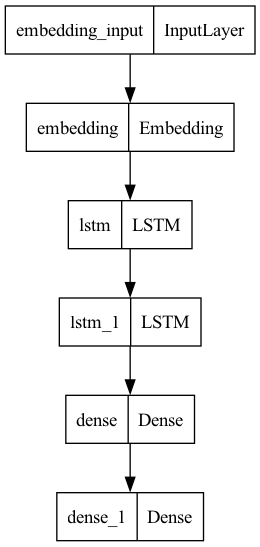

In [10]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model
 

plot_model(model, to_file='plot.png', show_layer_names=True)


The code below is setting up a `ModelCheckpoint` callback and then compiling and training the model. The ModelCheckpoint callback is used to save the model's weights during training, which can be helpful for later model evaluation or resuming training from a specific point.

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint
 
checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
27/28 [===========================>..] - ETA: 0s - loss: 6.2789
Epoch 1: loss improved from inf to 6.28155, saving model to next_words.h5
28/28 [==============================] - 3s 63ms/step - loss: 6.2815
Epoch 2/70
 2/28 [=>............................] - ETA: 1s - loss: 5.8666

/Users/cherilyogi/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - ETA: 0s - loss: 5.9075
Epoch 2: loss improved from 6.28155 to 5.90749, saving model to next_words.h5
28/28 [==============================] - 2s 65ms/step - loss: 5.9075
Epoch 3/70
28/28 [==============================] - ETA: 0s - loss: 5.8053
Epoch 3: loss improved from 5.90749 to 5.80534, saving model to next_words.h5
28/28 [==============================] - 2s 67ms/step - loss: 5.8053
Epoch 4/70
28/28 [==============================] - ETA: 0s - loss: 5.7174
Epoch 4: loss improved from 5.80534 to 5.71742, saving model to next_words.h5
28/28 [==============================] - 2s 74ms/step - loss: 5.7174
Epoch 5/70
28/28 [==============================] - ETA: 0s - loss: 5.6380
Epoch 5: loss improved from 5.71742 to 5.63804, saving model to next_words.h5
28/28 [==============================] - 2s 70ms/step - loss: 5.6380
Epoch 6/70
28/28 [==============================] - ETA: 0s - loss: 5.5621
Epoch 6: loss improved from 5.63804 to 5.56209, 

Epoch 39/70
28/28 [==============================] - ETA: 0s - loss: 1.1107
Epoch 39: loss improved from 1.24011 to 1.11067, saving model to next_words.h5
28/28 [==============================] - 2s 83ms/step - loss: 1.1107
Epoch 40/70
28/28 [==============================] - ETA: 0s - loss: 1.0459
Epoch 40: loss improved from 1.11067 to 1.04589, saving model to next_words.h5
28/28 [==============================] - 2s 88ms/step - loss: 1.0459
Epoch 41/70
28/28 [==============================] - ETA: 0s - loss: 0.8867
Epoch 41: loss improved from 1.04589 to 0.88672, saving model to next_words.h5
28/28 [==============================] - 2s 87ms/step - loss: 0.8867
Epoch 42/70
28/28 [==============================] - ETA: 0s - loss: 0.7363
Epoch 42: loss improved from 0.88672 to 0.73627, saving model to next_words.h5
28/28 [==============================] - 2s 79ms/step - loss: 0.7363
Epoch 43/70
28/28 [==============================] - ETA: 0s - loss: 0.6511
Epoch 43: loss improved from

The function `Predict_Next_Words`  uses a trained model to predict the next word in a sequence. 

In [12]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle
 
# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))
 
def Predict_Next_Words(model, tokenizer, text):
    
 
    sequence = tokenizer.texts_to_sequences([text])
    sequence = np.array(sequence)
    preds = np.argmax(model.predict(sequence))
    predicted_word = ""

    for key, value in tokenizer.word_index.items():
        if value == preds:
            predicted_word = key
            break

    print(predicted_word)
    return predicted_word


We have implemented a loop that allows a user to input a line of text, and we use the last three words of that text as input to our `Predict_Next_Words` function to predict the next word. If the user enters "0," the loop stops, and the execution completes.

In [14]:
while(True):
    text = input("Enter your line or enter 0 to stop execution: ")

    if text == "0":
        print("Execution completed.....")
        break

    else:
        try:
            text = text.split(" ")
            text = text[-3:]
            print(text)

            Predict_Next_Words(model, tokenizer, text)

        except Exception as e:
            print("Error occurred: ",e)
            continue

Enter your line or enter 0 to stop execution: राणा कुंभा अपनी बहन के साथ आधी रात को मंदिर गया
['को', 'मंदिर', 'गया']
1/1 [==============================] - 0s 11ms/step
वह
Enter your line or enter 0 to stop execution: बातें कर रही हो, उसे मेरे सामने लाओ।’ मीरा
['सामने', 'लाओ।’', 'मीरा']
1/1 [==============================] - 0s 255ms/step
कि
Enter your line or enter 0 to stop execution: 0
Execution completed.....
